In [195]:
%config IPCompleter.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import functools
from dfply import *
import glob
import pickle

# Experiment 1

In [196]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 1/fit results/*_model_2.pkl')]
betas = [f["fitResults"]["x"][-3] for f in fit_list]
Ns = [f["fitResults"]["x"][-2] for f in fit_list]
N_primes = [f["fitResults"]["x"][-1] for f in fit_list]

In [197]:
len(fit_list)

39

Looks like these saved outputs are missing some results?

<AxesSubplot:ylabel='Count'>

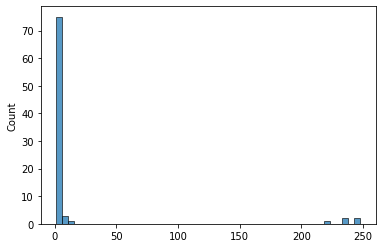

In [85]:
sns.reset_orig()
sns.histplot(Ns, bins=50)

<AxesSubplot:ylabel='Count'>

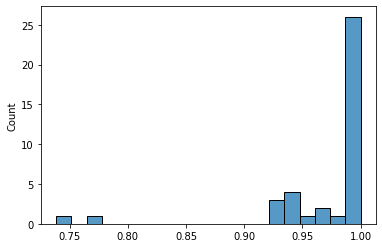

In [53]:
sns.reset_orig()
sns.histplot(betas, bins=20)

<AxesSubplot:ylabel='Count'>

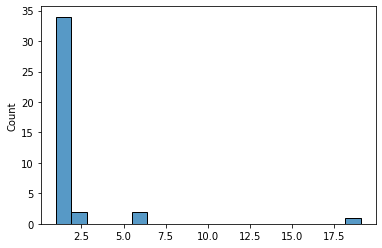

In [56]:
sns.reset_orig()
sns.histplot(N_primes, bins=20)

Loading in their data, I can't reproduce the paper's figure 5b. In particular N is wrong, their plot shows values of N around 100 and 150 that aren't in these model outputs.

# Experiment 2

In [82]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_2.pkl')]
betas = [f["fitResults"]["x"][-3] for f in fit_list]
Ns = [f["fitResults"]["x"][-2] for f in fit_list]
N_primes = [f["fitResults"]["x"][-1] for f in fit_list]

In [83]:
len(fit_list)

84

<AxesSubplot:ylabel='Count'>

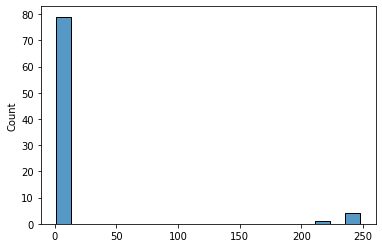

In [84]:
sns.reset_orig()
sns.histplot(Ns, bins=20)

<AxesSubplot:ylabel='Count'>

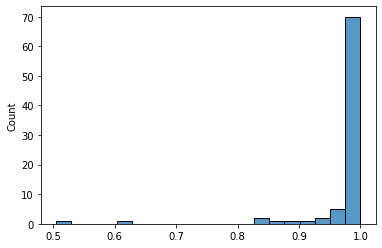

In [59]:
sns.reset_orig()
sns.histplot(betas, bins=20)

<AxesSubplot:ylabel='Count'>

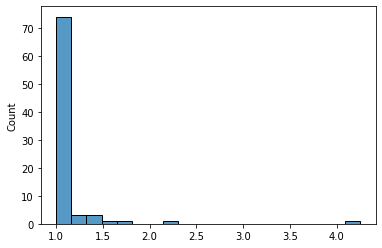

In [60]:
sns.reset_orig()
sns.histplot(N_primes, bins=20)

For experiment 2, things look quite different for N and N'. This just isn't what is shown in figure 8. And in this case there are the right number of model outputs for paricipants, so it's not just that things are missing. It's that there are many more ~1's than shown in the original paper and no values between ~10 and 150 as are shown in the paper. The results here are just completely different.

# Comparing responses and model predictions

Ok let's ignore experiment 1 and focus on experiment 2. Do the model predictions actually fit the observed responses at all?

In [186]:
fit_list = [pickle.load(open(f,"rb")) for f in glob.glob('osfstorage-archive/Data analysis and modelling for Experiment 2/fit results/*_model_2.pkl')]
df = pd.concat([pd.read_csv(f) for f in glob.glob('osfstorage-archive/Experiment 2/*.csv')], ignore_index = True)
df = (df >> 
     filter_by(~X.querydetail.str.contains("(warm|snowy)")) >>
#       mutate(estimate = X.estimate/100.) >>
      group_by(X.ID, X.querydetail, X.querytype) >>
      summarize(estimate = np.mean(X.estimate)) >>
      ungroup()
#       mutate(estimate = X.estimate.replace({0:.01, 1:.99})) >>
#       mutate(conjdisj_trial = X.querytype.apply(is_conjdisj))
     )

query_order = [' cold',
  ' rainy',
  ' not cold',
  ' not rainy',
  ' cold and rainy',
  ' rainy and not cold',
  ' cold and not rainy',
  ' not cold and not rainy',
  ' cold or rainy',
  ' rainy or not cold',
  ' cold or not rainy',
  ' not cold or not rainy',
  ' cold given rainy',
  ' not cold given rainy',
  ' cold given not rainy',
  ' not cold given not rainy',
  ' rainy given cold',
  ' not rainy given cold',
  ' rainy given not cold',
  ' not rainy given not cold',
  ' windy',
  ' cloudy',
  ' not windy',
  ' not cloudy',
  ' windy and cloudy',
  ' cloudy and not windy',
  ' windy and not cloudy',
  ' not windy and not cloudy',
  ' windy or cloudy',
  ' cloudy or not windy',
  ' windy or not cloudy',
  ' not windy or not cloudy',
  ' windy given cloudy',
  ' not windy given cloudy',
  ' windy given not cloudy',
  ' not windy given not cloudy',
  ' cloudy given windy',
  ' not cloudy given windy',
  ' cloudy given not windy',
  ' not cloudy given not windy',
  ' warm',
  ' snowy',
  ' not warm',
  ' not snowy',
  ' warm and snowy',
  ' snowy and not warm',
  ' warm and not snowy',
  ' not warm and not snowy',
  ' warm or snowy',
  ' snowy or not warm',
  ' warm or not snowy',
  ' not warm or not snowy',
  ' warm given snowy',
  ' not warm given snowy',
  ' warm given not snowy',
  ' not warm given not snowy',
  ' snowy given warm',
  ' not snowy given warm',
  ' snowy given not warm',
  ' not snowy given not warm']

test_df = (df >> filter_by(X.ID==1))
# test_df = df

df.querydetail = df.querydetail.astype("category")
df.querydetail.cat.set_categories(query_order, inplace=True)
df = df.sort_values(["ID", "querydetail"])

df[df.ID==1].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,querytype,querydetail,ID,estimate
5,A,cold,1,67.666667
28,B,rainy,1,79.000000
15,notA,not cold,1,45.000000
20,notB,not rainy,1,56.000000
7,AandB,cold and rainy,1,76.000000


In [187]:
pred_list = [f['predmean'] for f in fit_list]

df['model_pred'] = np.concatenate(pred_list)*100 # maybe this is wrong?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='model_pred', ylabel='estimate'>

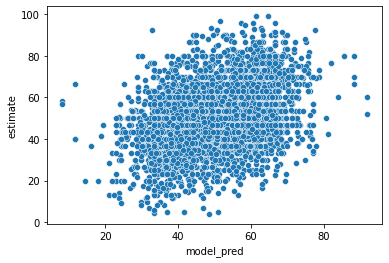

In [188]:
# df.plot.scatter(x='model_pred',y='estimate')
plot_df = df #>> filter_by(X.querytype.apply(lambda x: x in ["A","B"]))
sns.scatterplot(plot_df.model_pred, plot_df.estimate)#, hue=plot_df.querytype)

Ok now I am really connecting the right model predictions with the right rows, and the fit of the predictions to observed values is pretty weak. Basically, even if the BS model is better than PT+N (which it could be), it isn't a particularly good model when it comes to accounting for participants' responses. I'm not sure how we weigh that against the fact that these models make unique predictions about bias that afaik competing non-probabilistic models do not, and that these predictions are borne out in the aggregate. 

I guess all the authors care about are the average responses. But we're in the classic (Bayesian) cognitive model bind: what do we make of a theory that says probability judgments reflect probabilities on average across people, but where they do not seem to reflect probabilities for any individuals?

In [189]:
df[["model_pred", "estimate"]].corr()

,model_pred,estimate
model_pred,1.000000,0.360753
estimate,0.360753,1.000000


### Conjunction fallacies

Ok so here we plot a conjunction trial, and you can see the actual responses are reliably higher than the model predictions. Eyeballing it, it looks like abougt 2/3 of the residuals are positive. This seems to be a key part of the "conjunction fallacy" and it's something the model is not getting.

<AxesSubplot:xlabel='model_pred', ylabel='estimate'>

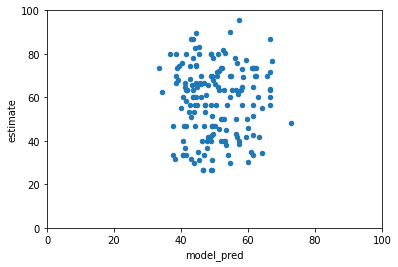

In [185]:
(df[df.querytype=="AandB"]).plot.scatter(x="model_pred", y="estimate", xlim=(0,100), ylim=(0,100))

## Fit of average predictions by query

The plots in the paper indicate the fit of the models' average predictions to the average responses for each trial type. No actual fit statistics are given but these are much more closely predictive.

<AxesSubplot:xlabel='mean_pred', ylabel='mean_est'>

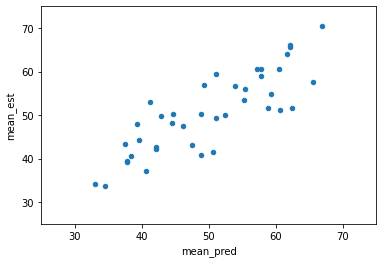

In [194]:
plot_df = df >> group_by(X.querydetail) >> summarize(mean_est = np.mean(X.estimate), mean_pred = np.mean(X.model_pred))
plot_df.plot.scatter(x="mean_pred", y="mean_est", xlim=(25,75), ylim=(25,75))


In [192]:
plot_df.corr()

,mean_est,mean_pred
mean_est,1.000000,0.837947
mean_pred,0.837947,1.000000


$R^2 = .68$ is a pretty decent model fit and much better than the individual-level means. It's sort of shocking that the difference between means and individuals is so great.